In [145]:
import numpy as np
#baris code ini berfungsi untuk meng-import library numpy yang digunakan untuk proses komputasi numerik

import matplotlib.pyplot as plt
import matplotlib.image as img
# mengimport library matplotlib (library yang bisa digunakan untuk menampilkan visualisasi grafik/gambar
# dalam kualitas yang bagus)

import cv2
#Berfungsi untuk memanggil library opencv untuk proses input, simpan dan menampilkan citra/image.

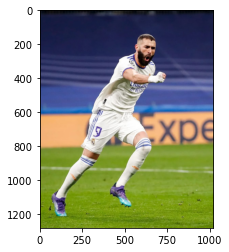

In [179]:
image=img.imread("modul1.jpg") # baris code ini digunakan untuk membaca image/gambar/citra yang
# akan digunakan atau yang akan diolah
plt.imshow(image) # baris code ini dugunakan untuk menampilkan image/citra yang telah diinputkan

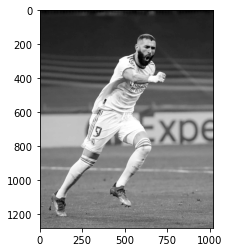

In [180]:
grayImage=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) # baris code ini di gunakan untuk mengubah warna citra menjadi abu-abu
plt.imshow(grayImage, cmap="gray") # menampilkan citra dengan warna abu-abu

In [181]:
tinggi,lebar=grayImage.shape #mengambil ukuran dari gambar atau citra dan disimpan dalam variabel tinggi dan lebar
print(tinggi, lebar) #menampilkan ukuran yang telah di ambil dan disimpan dalam variabel tinggi dan lebar

1280 1023


In [182]:
#fungsi ini berfungsi untuk menghitung nilai dari masing-masing keabuan, n(total fixel) 
#ni(jumlah kemunculan tiap fixel), dan hi(peluang kemunculan tiap piksel)
def  keabuan_n_ni_hi(imge):
    keabuan=np.arange(imge.max()+1) # membuat array dari 0 sampai dengan nilai maksimal pada image
    n=tinggi*lebar #menghitung jumlah semua fixel pada citra dan disimpan dalam variabel n
    ni=[0]*(imge.max()+1) #membuat array dari 0 sampai dengan nilai maksimal pada image
    
    #perulangan berikut untuk menghitung semua kemunculan piksel untuk tiap derajat keabuan
    for px in grayImage:
        for i in px:
            ni[i]=ni[i]+1
    
    hi=[] #deklarasi array yang bertujuan untuk menyimpan peluang kemunculan tiap derajat keabuan
    for i in range(grayImage.max()+1): #perulangan untuk memasukkan setiap peluang ke dalam array yang telah disiapkan
        hi.append(ni[i]/n)
        
    return keabuan,n,ni,hi #fungsi ini akan mengembalikan nilai keabuan, n, ni,hi

In [183]:
# fungsi untuk membuat histogram dengan parameter keabuan dan peluang 
def Histogram_hi(keabuan,peluang):
    plt.xlabel("Derajat Keabuan") # membuat label pada sumbu x pada histogram yang akan dibuat
    plt.ylabel("Hi (Peluang Kemunculan)") # membuat label pada sumbu y pada histogram yang akan dibuat
    plt.fill_between(keabuan, peluang) # membuat histogram dengan data berupa keabuan dan peluang kemunculannya
    plt.show() #menampilkan histogram 

In [184]:
# fungsi untuk membuat histogram dengan parameter keabuan dan kemunculan 
def Histogram_Jumlah(keabuan,kemunculan):
    plt.xlabel("Derajat Keabuan") # membuat label pada sumbu x pada histogram yang akan dibuat
    plt.ylabel("Jumlah Kemunculan") # membuat label pada sumbu y pada histogram yang akan dibuat
    plt.fill_between(keabuan, ni)  # membuat histogram dengan data berupa keabuan dan jumlah kemunculannya
    plt.show() #menampilkan histogram

In [185]:
keabuan, n, ni, hi=keabuan_n_ni_hi(grayImage) #meamnggil method keabuan_n_ni_hi() dan menyimpan nilai yang di kembalikan
#kedalam variabel keabuan, n, ni, dan hi

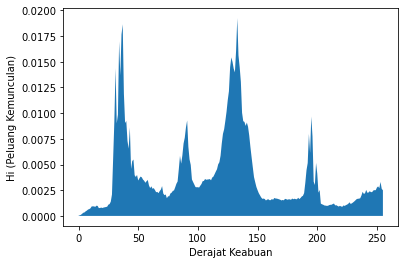

In [186]:
Histogram_hi(keabuan,hi) # memanggil method Histogram_hi() yang telah dideklarasikan atau didefinisikan sebelumnya untuk
#memmbuat dan menampilkan histogram

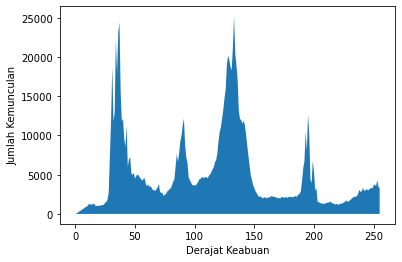

In [187]:
Histogram_Jumlah(keabuan,ni) # memanggil method Histogram_ni() yang telah dideklarasikan atau didefinisikan sebelumnya untuk
#memmbuat dan menampilkan histogram

In [188]:
#menampilkan nilai keabuan, ni, n, dan hi yang di dapatkan dari method keabuan_n_ni_hi()
print("\n\nKeabuan :\n")
print(keabuan)
print("\n\nNi(Jumlah kemunculan tiap derajat keabuan) :\n")
print(ni)
print("\n\nn :\n")
print(n)
print("\n\nHi(peluang kemunculan tiap derajat keabuan (ni/n)) :\n")
print(hi)



Keabuan :

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 2

In [224]:
######### KONVOLUSI #########
kernel =np.array([(0,-1,0),(-1,5,-1),(0,-1,0),(-1,5,-1)]) #deklarasi kernel yang digunakan untuk dalam proses konvolusi
print(kernel)

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]
 [-1  5 -1]]


In [225]:
#fungsi berikut untuk melakukan konvolusi pada sebuah image dengan kernel tertentu
def konvolusi(image,kernel):
    numberOfPadding=(max(kernel.shape)+1)/2 # banyaknya baris padding yang akan di tambahkan pada tiap sisi image
    newGrayImage=np.pad(image,int(numberOfPadding)) #menambahkan padding pada image dan menyimpannnya dalam matriks baru(newGrayImage)
    konv_noClip=np.zeros(image.shape) #menyiapkan sebuah matriks sebagai tempat untuk menyimpan hasil konvolusi tanpa clipping
    konv_Clip=np.zeros(image.shape) #menyiapkan sebuah matriks sebagai tempat untuk menyimpan hasil konvolusi dengan clipping
    
    y,x=konv_noClip.shape #mengambil dan menyimpan nilai ukuran dari konv_noClip dan disimpan dalam variabel x dan y
    yKernel,xKernel=kernel.shape #mengambil dan menyimpan nilai ukuran dari kernel dan disimpan dalam variabel xKernel dan yKernel
    
    #perulangan dibawah ini digunakan untuk melakukan operasi konvolusi pada citra yang disediakan
    for i in range (y): #perulangan sebanyak y
        for j in range (x): #perulangan sebanyak x
            for k in range (yKernel): #perulangan sebanyak yKernel
                for l in range (xKernel): #perulangan sebanyak xKernel
                    konv_noClip[i][j] +=newGrayImage[i+k][j+l]*kernel[k][l] # menyimpan nilai konvolusi untuk tiap piksel
                    
            konv_Clip[i][j] = konv_noClip[i][j] 

            #kondisi dibawah ini untuk melakukan klipping pada hasil konvolusi
            if konv_Clip[i][j] < 0:
                konv_Clip[i][j] = 0
            elif konv_Clip[i][j] > 255:
                konv_Clip[i][j] = 255
                
    return konv_noClip,konv_Clip #mengembalikan nilai konvolusi tanpa klipping dan dengan klipping

In [226]:
konv_noClip,konv_Clip=konvolusi(grayImage,kernel) #memanggil method konvolusi untuk melakukan konvolusi dan menyimpan nilai yang di
#kembalikan kedalam variabel konv_noClip dan konv_CLip

In [227]:
print(konv_noClip) #menampilkan matrik hasil konvolusi tanpa klipping

[[ -20.   60.   40. ...   29.   33.   32.]
 [ -40.  140.  100. ...   73.   82.   80.]
 [ -39.  116.   77. ...   58.   66.   64.]
 ...
 [-211.  629.  421. ...  480.  488.  495.]
 [-213.  637.  438. ...  514.  515.  503.]
 [-107.  214.  106. ...  130.  129.  128.]]


In [228]:
print(konv_Clip) #menampilkan matriks hasil konvolusi dengan klipping

[[  0.  60.  40. ...  29.  33.  32.]
 [  0. 140. 100. ...  73.  82.  80.]
 [  0. 116.  77. ...  58.  66.  64.]
 ...
 [  0. 255. 255. ... 255. 255. 255.]
 [  0. 255. 255. ... 255. 255. 255.]
 [  0. 214. 106. ... 130. 129. 128.]]


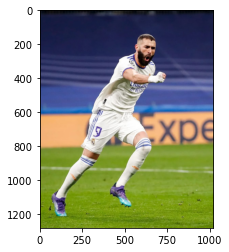

In [229]:
plt.imshow(image,'gray') #menampilkan gambar awal

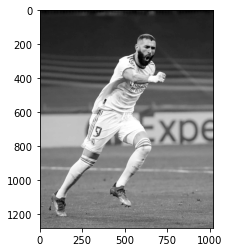

In [230]:
plt.imshow(grayImage,'gray') #menampilkan gambar setelah warnanya di lakukan perubahan warna

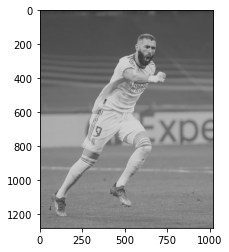

In [231]:
plt.imshow(konv_noClip,'gray') #gambar hasil konvolusi tanpa clipping

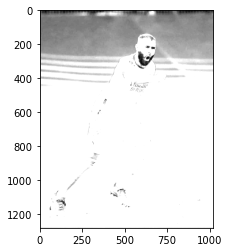

In [232]:
plt.imshow(konv_Clip,'gray') #gambar hasil konvolusi dengan clipping

In [222]:
print(konv_Clip)

[[  0.  60.  40. ...  29.  33.  32.]
 [  0. 140. 100. ...  73.  82.  80.]
 [  0. 116.  77. ...  58.  66.  64.]
 ...
 [  0. 255. 255. ... 255. 255. 255.]
 [  0. 255. 255. ... 255. 255. 255.]
 [  0. 214. 106. ... 130. 129. 128.]]


In [223]:
print(konv_noClip)

[[ -20.   60.   40. ...   29.   33.   32.]
 [ -40.  140.  100. ...   73.   82.   80.]
 [ -39.  116.   77. ...   58.   66.   64.]
 ...
 [-211.  629.  421. ...  480.  488.  495.]
 [-213.  637.  438. ...  514.  515.  503.]
 [-107.  214.  106. ...  130.  129.  128.]]
